# Resolution demonstration

This notebook demonstrates methods built into pyMACS relevant to the resolution matrix.

In [1]:
import sys
import os
import numpy as np
cwd = os.getcwd()
#Add the directory of the module to the path.
sys.path.append('/mnt/c/Users/tjh/OneDrive - NIST/GitHub/pyMACS/pyMACS')
from virtualMACS import VirtualMACS
import mcstasscript as ms
import matplotlib.pyplot as plt
import glob

In [2]:
# Use CrI3 as an example. 
macs_instr = VirtualMACS('resolution_demonstration',cifName='CrI3.cif',useOld=True)
macs_instr.sample.formula_weight=432.7
#The inputs to the web interface are simply the lattice parameters and the u-v vectors. 
macs_instr.kidney.Ef=5.0
macs_instr.sample.orient_u = [1,0,0]
macs_instr.sample.orient_v = [-1,2,0]
macs_instr.sample.project_sample_realspace()

1

[Errno 2] No such file or directory: 'Calculated_ellipsoids/MACS_resfunc_Ef_5.00meV_h_1.45_k_0.00_l_0.00_w_1.95.png'
Saving figure failed, ensure that the specfied figure directory exists.


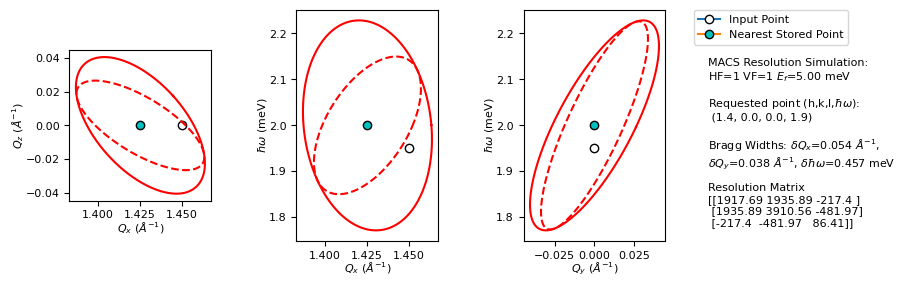

In [13]:
#The function above is just to make the plot of the data. 
h,k,l,w,Ef = 1.45,0.0,0.0,2.0,5.0

M_load,M_diag_load,Q_hkw_load = macs_instr.resmat(h,k,l,w,sampleFrame=True,
                                             gen_plot=True,verbose=False,figdir="Calculated_ellipsoids/")

In [14]:
interp_dqx, interp_dqz, interp_dE = macs_instr.load_res_fwhm_interp_objects()

## Now do a more in-depth plotting of resolution ellipsoids as function of Q, E

/tmp/ipykernel_212752/2041802118.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


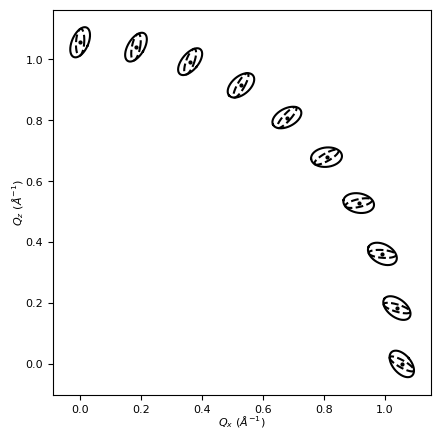

In [15]:
import numpy.linalg as la
import virtualMACS
fig,ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(hspace=0.5,wspace=0.5)

#Calculate a ring of ellipsoids
phi = np.linspace(0,2.0*np.pi/4,10)
for i,p in enumerate(phi):
    qvec = np.cos(p)*np.array([1.0,0.0,0.0])+np.sin(p)*np.array([-1.0/np.sqrt(3.0),2.0/np.sqrt(3.0),0.0])

    qxpt,qzpt = virtualMACS.resfunc.hkl_to_labframe(qvec[0],qvec[1],l,macs_instr)
    M_load,M_diag_load,Q_hkw_load = macs_instr.resmat(qvec[0],qvec[1],l,w,Ef,
                                                 gen_plot=False,verbose=False)
    sig2hwhm = np.sqrt(2. * np.log(2.))
    sig2fwhm = 2.*sig2hwhm
    
    Qmean=np.array([qxpt,qzpt,Q_hkw_load[2]])
    
    results,Qres_proj = virtualMACS.resfunc.calc_ellipses(M_load,verbose=False)
    
    ellfkt = lambda rad, rot, phi, Qmean2d : \
        np.dot(rot, np.array([ rad[0]*np.cos(phi), rad[1]*np.sin(phi) ])) + Qmean2d
    
    
    # 2d plots
    #fig = plot.figure()
    ellis = results
    num_ellis = len(ellis)
    coord_axes = [[0,1], [1,2], [0,2]]
    
    coord_axes = [[0,1], [0,2], [1,2]]
    
    ellplots = []
    for ellidx in [0]:
        # centre plots on zero or mean Q vector ?
        QxE = np.array([[0], [0]])
        QxE = np.array([[Qmean[coord_axes[ellidx][0]]], [Qmean[coord_axes[ellidx][1]]]])
    
        phi = np.linspace(0, 2.*np.pi, 361)
    
        ell_QxE = ellfkt(ellis[ellidx]["fwhms"]*0.5, ellis[ellidx]["rot"], phi, QxE)
        ell_QxE_proj = ellfkt(ellis[ellidx]["fwhms_proj"]*0.5, ellis[ellidx]["rot_proj"], phi, QxE)
        ellplots.append({"sliced":ell_QxE, "proj":ell_QxE_proj})
    
        ax.plot(ell_QxE[0], ell_QxE[1], c="k", linestyle="dashed")
        ax.plot(ell_QxE_proj[0], ell_QxE_proj[1], c="k", linestyle="solid")
    ax.plot(qxpt,qzpt,marker='o',mfc='k',mec='k',ms=2)

ax.set_xlabel(r"$Q_x\ (\AA^{-1}$)",labelpad=0,fontsize=8)
ax.set_ylabel(r"$Q_z\ (\AA^{-1}$)",labelpad=0,fontsize=8)
#Match limits of dave plots
ax.set_aspect(1)
#ax[1].set_aspect(1)
#ax[2].set_aspect(1)


fig.show()

/tmp/ipykernel_212752/3483029404.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


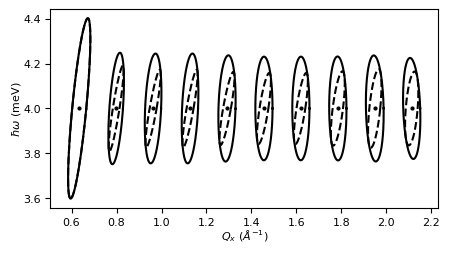

In [20]:
# final example is a Qx vs E slice verison of above plot 
import numpy.linalg as la
fig,ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(hspace=0.5,wspace=0.5)

#Calculate a ring of ellipsoids
hpts = np.linspace(0.6,2.0,10)
for i,hpt in enumerate(hpts):
    qvec = np.array([hpt,0.0,0.0])

    qxpt,qzpt = virtualMACS.resfunc.hkl_to_labframe(qvec[0],qvec[1],l,macs_instr)
    M_load,M_diag_load,Q_hkw_load = macs_instr.resmat(qvec[0],qvec[1],0.0,4.2,Ef,
                                                 gen_plot=False,verbose=False)
    sig2hwhm = np.sqrt(2. * np.log(2.))
    sig2fwhm = 2.*sig2hwhm
    
    Qmean=np.array([qxpt,qzpt,Q_hkw_load[2]])
    
    
    results,Qres_proj = virtualMACS.resfunc.calc_ellipses(M_load,verbose=False)
    
    ellfkt = lambda rad, rot, phi, Qmean2d : \
        np.dot(rot, np.array([ rad[0]*np.cos(phi), rad[1]*np.sin(phi) ])) + Qmean2d
    
    
    # 2d plots
    #fig = plot.figure()
    ellis = results
    num_ellis = len(ellis)
    coord_axes = [[0,1], [1,2], [0,2]]
    
    coord_axes = [[0,1], [0,2], [1,2]]
    
    ellplots = []
    for ellidx in [1]:
        # centre plots on zero or mean Q vector ?
        QxE = np.array([[0], [0]])
        QxE = np.array([[Qmean[coord_axes[ellidx][0]]], [Qmean[coord_axes[ellidx][1]]]])
    
        phi = np.linspace(0, 2.*np.pi, 361)
    
        ell_QxE = ellfkt(ellis[ellidx]["fwhms"]*0.5, ellis[ellidx]["rot"], phi, QxE)
        ell_QxE_proj = ellfkt(ellis[ellidx]["fwhms_proj"]*0.5, ellis[ellidx]["rot_proj"], phi, QxE)
        ellplots.append({"sliced":ell_QxE, "proj":ell_QxE_proj})
    
        ax.plot(ell_QxE[0], ell_QxE[1], c="k", linestyle="dashed")
        ax.plot(ell_QxE_proj[0], ell_QxE_proj[1], c="k", linestyle="solid")
    ax.plot(qxpt,4,marker='o',mfc='k',mec='k',ms=2)

ax.set_xlabel(r"$Q_x\ (\AA^{-1}$)",labelpad=0,fontsize=8)
ax.set_ylabel(r"$\hbar\omega$ (meV)",labelpad=0,fontsize=8)
#Match limits of dave plots
ax.set_aspect(1)
#ax[1].set_aspect(1)
#ax[2].set_aspect(1)


fig.show()